# Week 3

I hope you're getting the hang of things. Today we're going on with the prinicples of data visualization!

## Overview

Once again, the lecture has three parts:

* First you will watch a video on visualization and solve a couple of exercises.
* After that, we'll be reading about *scientific data visualization*, and the huge number of things you can do with just one variable. Naturally, we'll be answering questions about that book. 
* And finally reproducing some of the plots from that book.

## Part 1: Fundamentals of data visualization

Last week we had a small introduction of data visualization. Today, we are going to be a bit more specific on data analysis and visualization. Digging a bit more into the theory with the next video.

<mark>*It's important to highlight that these lectures are quite important. We don't have a formal book on data visualization. So the only source of knowledge about the **principles**, **theories**, and **ideas**, that are the foundation for good data viz, comes from the videos*. So watch them 🤓 </mark>

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/yiU56codNlI/0.jpg)](https://www.youtube.com/watch?v=yiU56codNlI)

> *Excercise 1.1:* Questions for the lecture
> * As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?
> **Answer:** The pearson correlation is defined as $\rho(x,y) = \frac{cov(x,y)}{\sigma_x\sigma_y}$ that is the covariance between x and y divided by their standard deviations multiplied. If $\rho > 0$ there is a positive correlation and $\rho < 0$ there is a negative correlation. For $\rho = 0$ there is no correlation. The pearson correlation can only capture linear correlation of variables, thus if we had $y = x**2$ then $\rho(x,y) = 0$ but the visualization would show a quadratic polynomial.
> * What is the difference between a bar-chart and a histogram?
> **Answer:** A bar-chart shows the count over some criteria or group, usually requires two variables. The histogram shows the frequency or density of one variable, thus showing its distribution.
> * I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.
> **Answer:** A common approach is that $numberofbins = ceil( \frac{(maximumvalue - minimumvalue)}{binwidth})$ that accounts for the range of the data (width in the plot) divided by the bin width which gives you how many bins there are room for in the range.

Ok, now that we've talked a bit about correlation and distributions, we are going to compute/visualize them while also testing some hypotheses along the way. Until now, we have analysed data at an explorative level, but we can use statistics to verify whether relationships between variables are significant. We'll do this in the following exercise.

### *Exercise 1.2:*
> Hypothesis testing. We will look into correlations between number of steps and BMI, and differences between two data samples (Females vs Males). Follow the steps below for success:
> * First, we need to get some data. Download and read the data from the Female group [here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data9b_f.csv) and the one from the Male group [here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data9b_m.csv).
>

In [3]:
import pandas as pd

female = pd.read_csv("https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data9b_f.csv")
male = pd.read_csv("https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data9b_m.csv")

> * Next, we are going to verify the following hypotheses:
>    1. <mark>*H1: there is a statistically significant difference in the average number of steps taken by men and women*</mark>. Is there a statistically significant difference between the two groups? What is the difference between their mean number of steps? Plot two histograms to visualize the step-count distributions, and use the criterion you chose in Ex.1.1 to define the right bin-size.
     **Hint** you can use the function `ttest_ind()` from the `stats` package to test the hypothesis and consider a significance level $\alpha=0.05$.
>    2. <mark>*H2: there is a negative correlation between the number of steps and the BMI for women*.</mark> We will use Pearson's correlation here. Is there a negative correlation? How big is it?
>    3. <mark>*H3: there is a positive correlation between the number of steps and the BMI for men*.</mark> Is there a positive correlation? Compare it with the one you found for women.
>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()


def get_bins(data, binwidth=1000):
    return range(min(data), max(data) + binwidth, binwidth)

#### Hypothesis 1
> There is a statistically significant difference in the average number of steps taken by men and women .

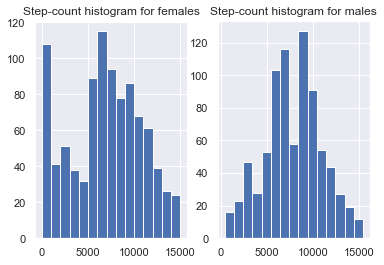

In [62]:

f, (ax1, ax2) = plt.subplots(1, 2)
female['steps'].hist(bins=get_bins(female['steps'], 1000), ax=ax1)
ax1.set_title('Step-count histogram for females')

male['steps'].hist(bins=get_bins(male['steps'], 1000), ax=ax2)
ax2.set_title('Step-count histogram for males')

plt.show()

In [36]:
from scipy.stats import ttest_ind

res = ttest_ind(female['steps'], male['steps'])

print(f'Is there a significant difference between male and female step counts? {res.pvalue < 0.05}')

Is there a significant difference between male and female step counts? True


#### Hypothesis 2
There is a negative correlation between the number of steps and the BMI for women

In [48]:
print(f"The correlation between female step counts and BMI is: {female.corr().iloc[0, 1]:.3}")

The correlation between female step counts and BMI is: -0.356


#### Hypothesis 3
There is a positive correlation between the number of steps and the BMI for men

In [49]:
print(f"The correlation between male step counts and BMI is: {male.corr().iloc[0, 1]:.3}")

The correlation between male step counts and BMI is: -0.16


We see that both males and females have a negative correlation between their step count and BMI. However, women seem to have a larger negative correlation between walking and losing weight. Perhaps, they spend more energy when they walk, or they just include more exercise when they walk... this can be investigated using different datasets.

> * We have now gathered the results. Can you find a possible explanation for what you observed? You don't need to come up with a grand theory about mobility and gender, just try to find something (e.g. theory, news, papers, further analysis etc.) to support your conclusions and write down a couple of sentences.

As talked about previously, the activities around when women walk could affect the relationship more, and the fact that they walk more as an exercise than men. It could also be the fact that men just have a larger calorie intake than women in general and the diminishes the effect of walking. As a conclusion, it seems that women tend to burn more fat than men.


> *Exercise 1.3:* scatter plots. We're now going to fully visualize the data from the previous exercise.
>
> * Create a scatter plot with both data samples. Use `color='#f6756d'` for one <font color=#f6756d>sample</font> and `color='#10bdc3'` for the other <font color=#10bdc3>sample</font>. The data is in front of you, what do you observe? Take a minute to think about these exercises: what do you think the point is?
    * After answering the questions above, have a look at this [paper](https://genomebiology.biomedcentral.com/track/pdf/10.1186/s13059-020-02133-w.pdf) (in particular, read the *Not all who wander are lost* section).

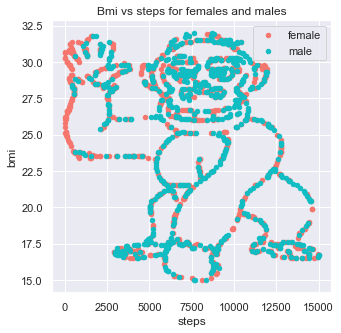

In [71]:
f, ax1 = plt.subplots(1, 1, figsize=(5, 5))
female.plot(kind='scatter', x='steps', y='bmi', color='#f6756d', ax=ax1, label='female')
ax1.set_title('Bmi vs steps for females and males')
male.plot(kind='scatter', x='steps', y='bmi', color='#10bdc3', ax=ax1, label='male')
plt.legend()
plt.show()

Obviously, the point is to show that one can perform a plethora of statistical analysis but without visualization we will rarely be able to understand the nature of the data. Which in this case is that it's clearly user-made and does not actually represent the step count vs bmi relationship for men and women.


> * The scatter plot made me think of another point we often overlook: *color-vision impairments*. When visualizing and explaining data, we need to think about our audience:
>    * We used the same colors as in the paper, try to save the figure and use any color-blindness simulator you find on the web ([this](https://www.color-blindness.com/coblis-color-blindness-simulator/) was the first that came out in my browser). Are the colors used problematic? Explain why, and try different types of colors. If you are interested in knowing more you can read this [paper](https://www.tandfonline.com/doi/pdf/10.1179/000870403235002042?casa_token=MAYp78HctgQAAAAA:AZKSHJWuNmoMXD5Dtqln1Sc-xjNwCe6UVDMVEpP95UjTH3O1H-NKRkfYljw2VLSm_zKlN74Da6g).
>    * But, are colors the only option we have? Find an alternative to colors, explain it, and change your scatter plot accordingly.

* The colors change especially for 'red-blind/protanopia' color blind people. Then it can be difficult to distinguish between the two different points.
* An alternative to colors are different symbols such as crosses, squares, triangles, striped lines and so on. And it is often preferred in addition to colors!

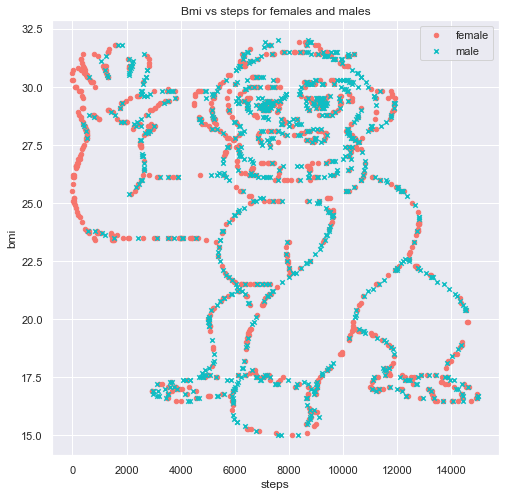

In [83]:
f, ax1 = plt.subplots(1, 1, figsize=(8, 8))
female.plot(kind='scatter', x='steps', y='bmi', color='#f6756d', marker='o', ax=ax1, label='female')
ax1.set_title('Bmi vs steps for females and males')

male.plot(kind='scatter', x='steps', y='bmi', color='#10bdc3', ax=ax1, marker='x', label='male')
plt.legend()
plt.show()

## Part 2: Reading about the theory of visualization

Since we can go deeper with the visualization this year, we are going to read the first couple of chapters from [*Data Analysis with Open Source Tools*](http://shop.oreilly.com/product/9780596802363.do) (DAOST). It's pretty old, but I think it's a fantastic resource and one that is pretty much as relevant now as it was back then. The author is a physicist (like Sune) so he likes the way he thinks. And the books takes the reader all the way from visualization, through modeling to computational mining. Anywho - it's a great book and well worth reading in its entirety. 

As part of this class we'll be reading the first chapters. Today, we'll read chaper 2 (the first 28 pages) which supports and deepens many of the points we made during the video above. 

To find the text, you will need to go to **DTU Learn**. It's under "Course content" $\rightarrow$ "Content" $\rightarrow$ "Lecture 3 reading".

> *Excercise 2*: Questions for DAOST

 * Explain in your own words the point of the jitter plot

> **Answer:** The point of a jitter plot is to avoid the case of a dot plot where points lie directly on top of each other. The jitter plot solves this by introducing a small random noise

 * Explain in your own words the point of figure 2-3. (I'm going to skip saying in your own words going forward, but I hope you get the point; I expect all answers to be in your own words)

> **Answer:** It aims to show that histograms are not always perfect out of the box. They require some thinking with respect to anchoring of the bins, the bin width and number of bins in order to accurately represent the distribution

 * The author of DAOST (Philipp Janert) likes KDEs (and think they're better than histograms). And we don't. Sune didn't give a detailed explanation in the video, but now that works to our advantage. We'll ask you to think about this and thereby create an excellent exercise: When can KDEs be misleading

> **Answer:** KDEs can produce smooth representations of dataset whilst also accounting for outliers. However, they are highly influenced by the choice of hyperparameters such as the bandwidth. The data scientist may choose to make a dataset seem larger and more significant than it actually is if the bandwidth is chosen 'correctly'. Moreover, KDEs can cause performance issues for larger datasets. The choice of bandwidth is often a bias-variance trade-off as described in the book which leads to complicated techniques such as cross-validation for producing just a simple plot of a distribution

* Sune discussed some strengths of the CDF - there are also weaknesses. Janert writes CDFs have less intuitive appeal than histograms of KDEs. What does he mean by that

> **Answer:** The value on a CDF plot are always influenced by the previous values which means that the reader has to keep in mind all the previous value up until a certain point and subtract that from the next point to get the change in density from one point to another. This is quite cumbersome in comparison to just looking at a bin for each range that in itself describes how many values there are in the given range. Moreover, instantaneous changes in CDFs are hard to notice for both small and large changes as it is the gradient of the slope that describes the change, and not the value of the line

* What is a *Quantile plot*? What is it good for

> **Answer:** They make the CDF more interpretable as the reader can read from the y axis to the axis. Asking question such as: What response tim
corresponds to the 10th percentile of response times

* How is a *Probablity plot* defined? What is it useful for? Have you ever seen one before

> **Answer:** The probability plot is defined as the inverse of the gaussian distribution. An by a bit of algebra, you can get a linear relationship of a data set as a function of $\phi^{-1} (y_i)$ with intercept $\mu$ and slope $\sigma$. This means that any normal distributed variable should fall on a straight line. However, if it does not, it means that the data is not distributed according to a normal distribution

* One of the reasons we like DAOST is that Janert is so suspicious of mean, median, and related summary statistics. Explain why one has to be careful when usin
those - and why visualization of the full data is always better

> **Answer:** First off, they apply only under certain assumptions and are misleading if those assumptions are not fulfilled. Those assumptions are for example that the data is *unimodal*. By visualizing the data it can quickly be inspected if the distribution is uni or bi or more modal

* Sune loves box plots (but not enough to own one of [these](https://twitter.com/statisticiann/status/1387454947143426049) 😂). When are box plots most useful

> **Answer:** Box plots are great to represent outliers and a dataset's percentile and median values. It also allows us to see if the data set is symmetric and how the data distributes around the mean. They are often best when comparing multiple distributions against each other

* The book doesn't mention [violin plots](https://en.wikipedia.org/wiki/Violin_plot). Are those better or worse than box plots? Why

> **Answer:** A violin plot is a hybrid of the KDE and box plot. This means that violin plots can additionally show density of the distribution and not only its summary statistics! Since it provides more information, it can definitely be better than a box plot. However, one should care that the KDE does not become over representative and show things that may be misleading.

## Part 3: *Finally*! Let's create some visualizations

### *Exercise 3.1*: Connecting the dots and recreating plots from DAOST but using our own favorite dataset.
>
> * Let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on *SF Police data*. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

In [4]:
df_raw = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
df_raw.Date = pd.to_datetime(df_raw['Date']) + pd.to_timedelta(df_raw['Time'] + ':00')

In [14]:
df = df_raw[df_raw.Date.dt.year < 2018]

In [15]:
from datetime import datetime
import numpy as np

In [36]:
df_plot_1 = df[
    (df.Date >= datetime(2016, 8, 1, 13)) & (df.Date <= datetime(2016, 10, 1, 14)) & (df.Category == 'ASSAULT')]

In [37]:
df_plot_1 = df_plot_1[(df_plot_1.Date.dt.hour >= 13) & (df_plot_1.Date.dt.hour <= 14)]

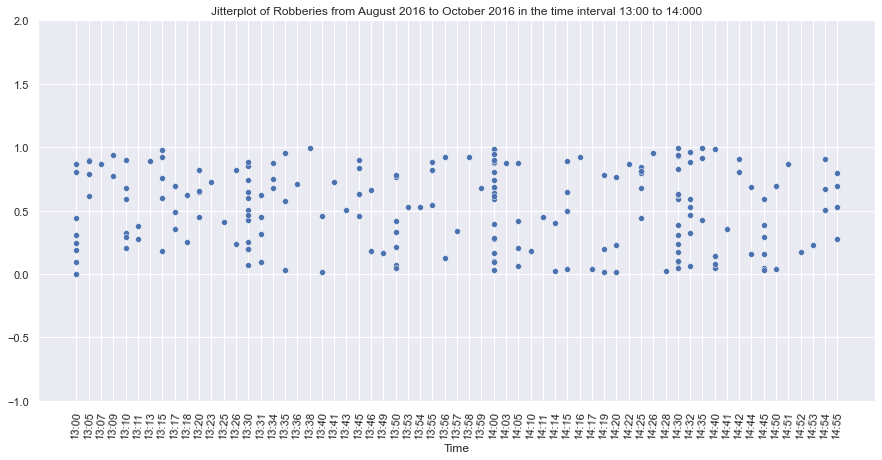

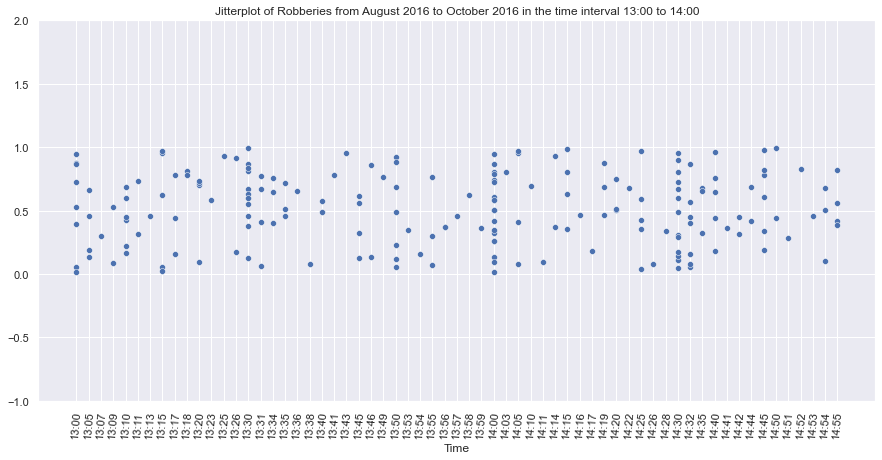

In [43]:
fig = plt.figure(figsize=(15,7))
g = sns.scatterplot(x=df_plot_1['Time'].sort_values(), y=np.random.random(len(df_plot_1)))
plt.xticks(rotation=85)
plt.ylim([-1, 2])
plt.title('Jitterplot of Robberies from August 2016 to October 2016 in the time interval 13:00 to 14:00')
plt.show()

> * Last time, we did lots of bar-plots. Today, we'll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). I think the GPS data could be fun to see this way.
>   * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
>   * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting.

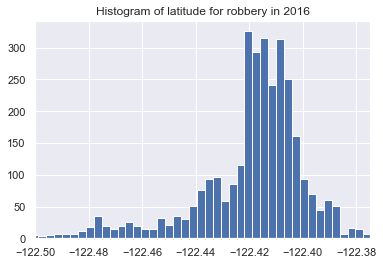

In [236]:
df_plot_2 = df[(df.Date >= datetime(2016, 1, 1)) & (df.Date <= datetime(2016, 12, 31)) & (df.Category == 'ROBBERY')]
df_plot_2['X'].hist(bins=50)
plt.xlim([-122.5, -122.375])
plt.title('Histogram of latitude for robbery in 2016')
plt.show()

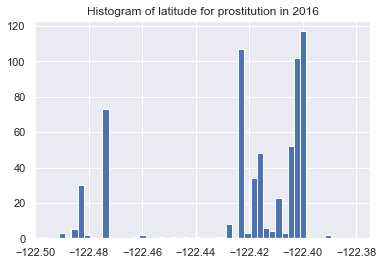

In [237]:
df_plot_3 = df[
    (df.Date >= datetime(2016, 1, 1)) & (df.Date <= datetime(2016, 12, 31)) & (df.Category == 'PROSTITUTION')]
df_plot_3['X'].hist(bins=50)
plt.xlim([-122.5, -122.375])
plt.title('Histogram of latitude for prostitution in 2016')
plt.show()


> * Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. To create the kernel density plot, you can either use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).
> * Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading?
>
> Let's take a break. Get some coffee or water. Stretch your legs. Talk to your friends for a bit. Breathe. Get relaxed so you're ready for the second part of the exercise.

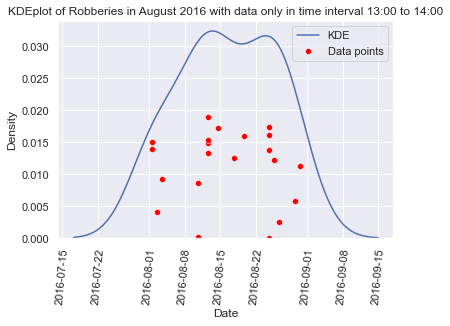

In [235]:
fig, ax = plt.subplots(1, 1)

sns.kdeplot(df_plot_1.Date, label='KDE', ax=ax)
sns.scatterplot(x=df_plot_1.Date, y=np.random.random(len(df_plot_1)) / 50, color='red', label='Data points', ax=ax)

plt.xticks(rotation=85)
plt.title('KDEplot of Robberies in August 2016 with data only in time interval 13:00 to 14:00')
plt.legend()
plt.show()

We see that the KDE does say that some data exists in the tails but in fact there is no data at all..

### *Exercise 3.2*. Ok. Now for more plots 😊
> * Now we'll work on creating two versions of the plot in **Figure 2-11**, but using the GPS data you used for your version of Figure 2-2. Comment on the result. It is not easy to create this plot from scracth.
     **Hint:** Take a look at the `scipy.stats.probplot` function.


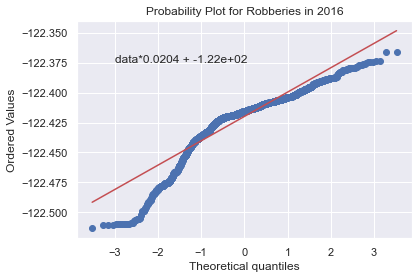

In [264]:
from scipy.stats import probplot

res = probplot(df_plot_2.X, plot=plt)

slope = res[1][0]
intercept = res[1][1]
linear_func = f"data*{slope:.3} + {intercept:.3}"
plt.text(x=-3, y=-122.375, s=linear_func)
plt.title('Probability Plot for Robberies in 2016')
plt.show()

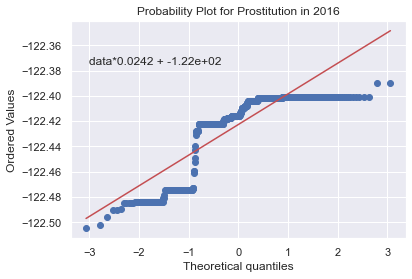

In [265]:
res = probplot(df_plot_3.X, plot=plt)

slope = res[1][0]
intercept = res[1][1]
linear_func = f"data*{slope:.3} + {intercept:.3}"
plt.text(x=-3, y=-122.375, s=linear_func)
plt.title('Probability Plot for Prostitution in 2016')
plt.show()

> * OK, we're almost done, but we need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 15 focus crimes defined last week.
>   * For the full time-span of the data, calulate the **number of crimes per day** within each category for the entire duration of the data.
>   * Create a box-and whiskers plot showing the mean, median, quantiles, etc for all 15 crime-types side-by-side. There are many ways to do this. I like to use [matplotlibs's built in functionality](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html), but you can also achieve good results with [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html) or [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html).
>   * What does this plot reveal that you can't see in the plots from last time?

In [267]:
focuscrimes = {'WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT',
               'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT',
               'STOLEN PROPERTY', 'DISORDERLY CONDUCT'}

df_raw = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
df_raw.Date = pd.to_datetime(df_raw['Date']) + pd.to_timedelta(df_raw['Time'] + ':00')
df = df_raw[df_raw.Category.isin(focuscrimes)]

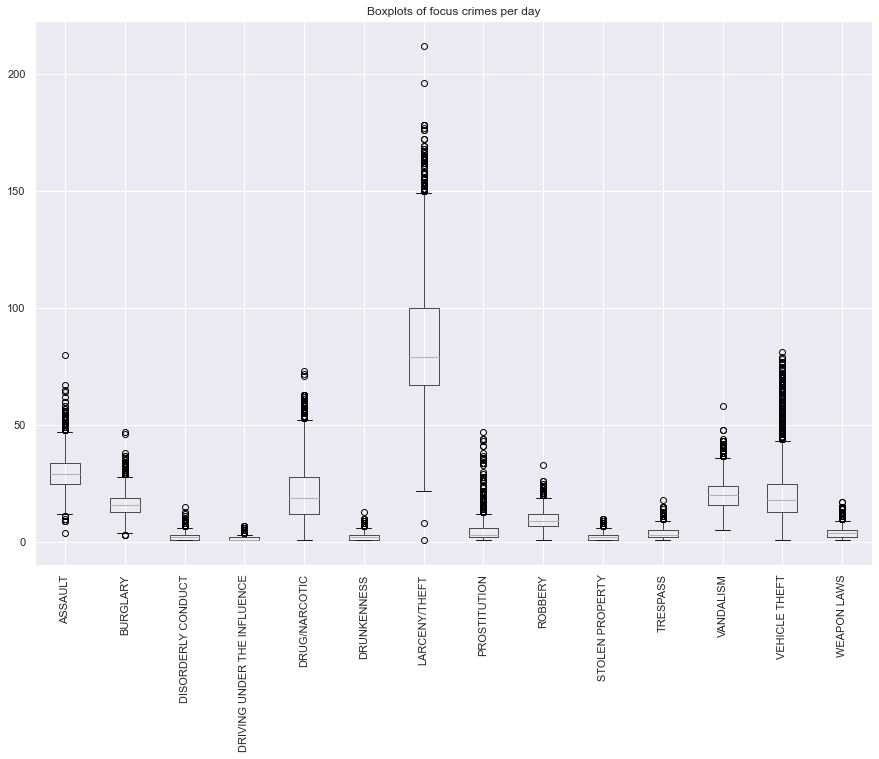

In [310]:
df.groupby([df.Date.dt.floor('d'), df.Category]).count()['PdId'].reset_index().pivot_table('PdId', ['Date'],
                                                                                           'Category').boxplot(
    figsize=(15, 10))
plt.xticks(rotation=90)
plt.title('Box plots of focus crimes per day')
plt.show()

This time we are shown the outliers as well as the summary statistics for each category

> * Also I want to show you guys another interesting use of box plots. To get started, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it.
    * For datapoint, the only thing you care about is the time-of-day, so discard everything else.
    * You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. I can think of two ways to deal with this.
      * For each time-of-day, simply encode it as seconds since midnight.
      * Or keep each whole hour, and convert the minute/second count to a percentage of an hour. So 10:15 $\rightarrow$ 10.25, 8:40 $\rightarrow$ 8.67, etc.
    * Now you can create box-plots to create an overview of *when various crimes occur*. Note that these plot have quite a different interpretation than ones we created in the previous exercise. Cool, right?

In [2]:
df_new = df[['Category', 'Date']]
df_new.head()

NameError: name 'df' is not defined

In [341]:
df_new['Minutes_since_midnight'] = df_new.Date.dt.hour * 60 + df_new.Date.dt.minute
df_new.head()

C:\Users\moeso\AppData\Local\Temp/ipykernel_30224/1132509496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Minutes_since_midnight'] = df_new.Date.dt.hour * 60 + df_new.Date.dt.minute


,Category,Date,Minutes_since_midnight
0,LARCENY/THEFT,2003-09-28 10:00:00,600
1,ASSAULT,2005-06-22 12:20:00,740
2,ASSAULT,2006-07-15 00:55:00,55
3,ASSAULT,2007-09-25 00:01:00,1
5,ASSAULT,2003-12-12 12:00:00,720


In [1]:
df_new.Date.dt.hour.hist(bins=75)
plt.title('Histogram of minutes since midnight')
plt.show()

NameError: name 'df_new' is not defined

It looks like they are quite inconsistent with logging the time. It usually happens in bulk.

In [407]:
# Count occurences for each minute since midnight pr category
df_counts = df_new.value_counts(['Minutes_since_midnight', 'Category']).reset_index().rename({0: 'count'}, axis=1)

In [408]:
N = len(df_new.Minutes_since_midnight.unique())

In [412]:
df_counts['Avg_pr_minute_since_midnight'] = df_counts.apply(lambda x: x['count'] / N, axis=1)

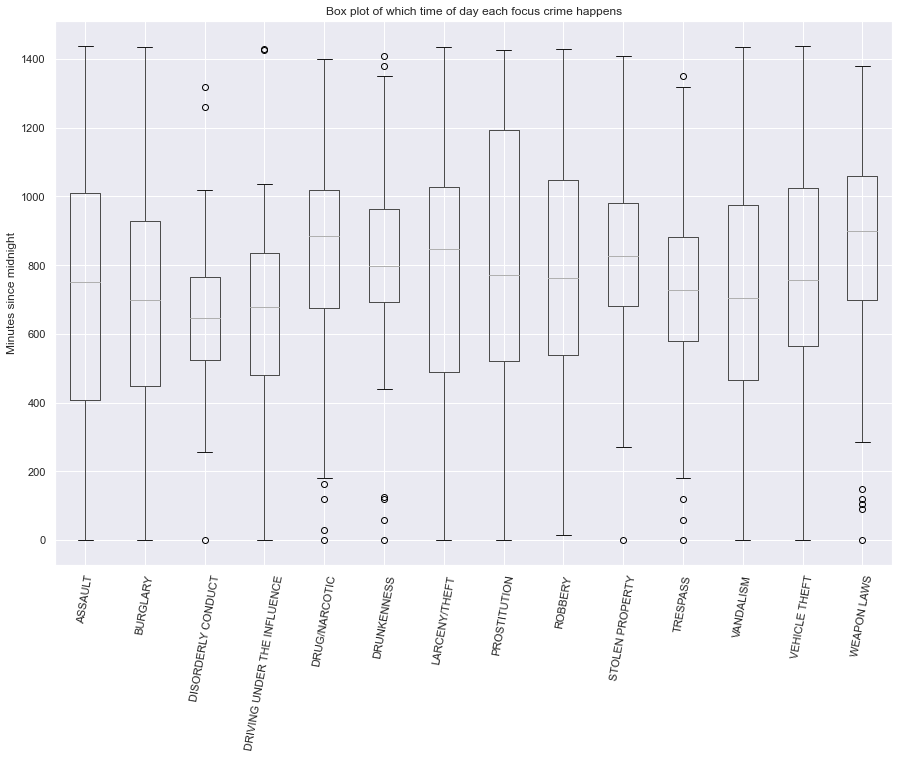

In [420]:
df_counts.pivot_table('Minutes_since_midnight', ['Avg_pr_minute_since_midnight'], 'Category').boxplot(figsize=(15,10))
plt.xticks(rotation=80)
plt.title('Box plot of which time of day each focus crime happens')
plt.ylabel('Minutes since midnight')
plt.show()

Pretty cool. Drunkenness happens mostly in the midday! Whilst disorderly conduct happens mostly in the mornings.